Loaded CLIP features of shape: (328417, 512)


/home/inimai/anaconda3/envs/myenv/lib/python3.9/site-packages/numpy/core/_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


Mean of feature vector norms: 1.0000
Std of feature vector norms: inf


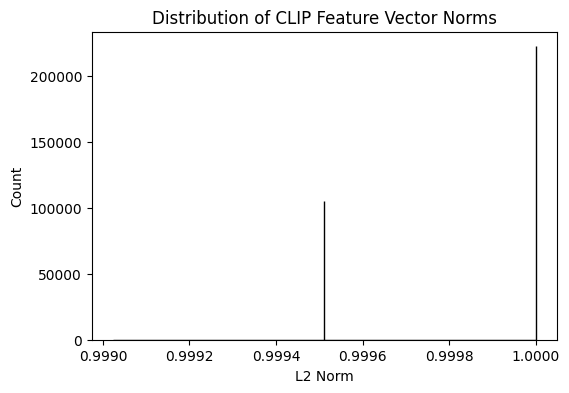

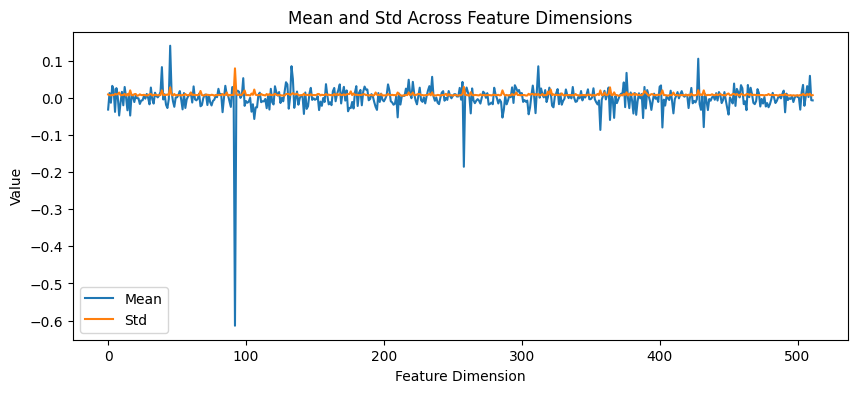

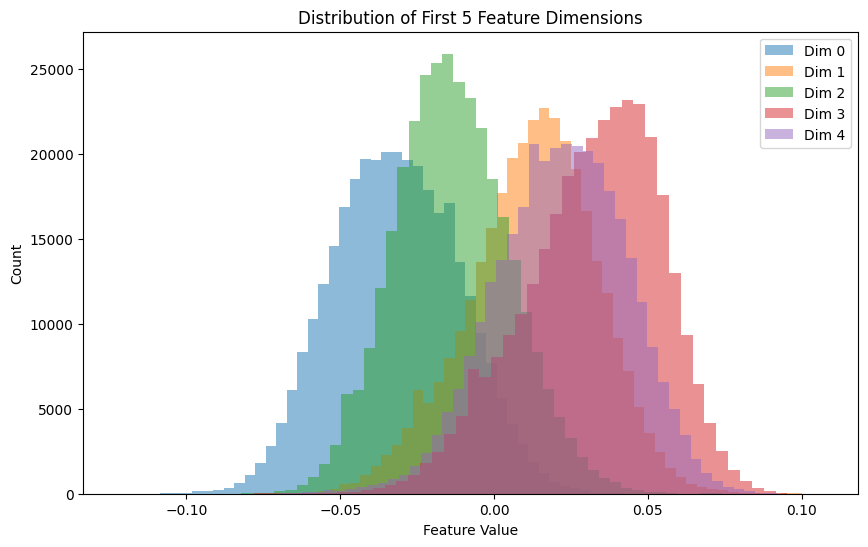

In [1]:
import numpy as np
import matplotlib.pyplot as plt

CLIP_DIR = "/om2/data/public/braintreebank_movies_clip_preprocessed_2/ant-man_clip_features.npy"

# Load the CLIP features
clip_features = np.load(CLIP_DIR)  # shape: (num_samples, feature_dim)

print(f"Loaded CLIP features of shape: {clip_features.shape}")

# Compute statistics
mean_per_dim = np.mean(clip_features, axis=0)
std_per_dim = np.std(clip_features, axis=0)
mean_norm = np.mean(np.linalg.norm(clip_features, axis=1))
std_norm = np.std(np.linalg.norm(clip_features, axis=1))

print(f"Mean of feature vector norms: {mean_norm:.4f}")
print(f"Std of feature vector norms: {std_norm:.4f}")

# Plot histogram of feature vector norms
plt.figure(figsize=(6,4))
plt.hist(np.linalg.norm(clip_features, axis=1), bins=50, color='skyblue', edgecolor='k')
plt.title("Distribution of CLIP Feature Vector Norms")
plt.xlabel("L2 Norm")
plt.ylabel("Count")
plt.show()

# Plot mean and std across feature dimensions
plt.figure(figsize=(10,4))
plt.plot(mean_per_dim, label='Mean')
plt.plot(std_per_dim, label='Std')
plt.title("Mean and Std Across Feature Dimensions")
plt.xlabel("Feature Dimension")
plt.ylabel("Value")
plt.legend()
plt.show()

# Optionally, plot a few feature dimensions' distributions
plt.figure(figsize=(10,6))
for i in range(min(5, clip_features.shape[1])):
    plt.hist(clip_features[:, i], bins=50, alpha=0.5, label=f"Dim {i}")
plt.title("Distribution of First 5 Feature Dimensions")
plt.xlabel("Feature Value")
plt.ylabel("Count")
plt.legend()
plt.show()


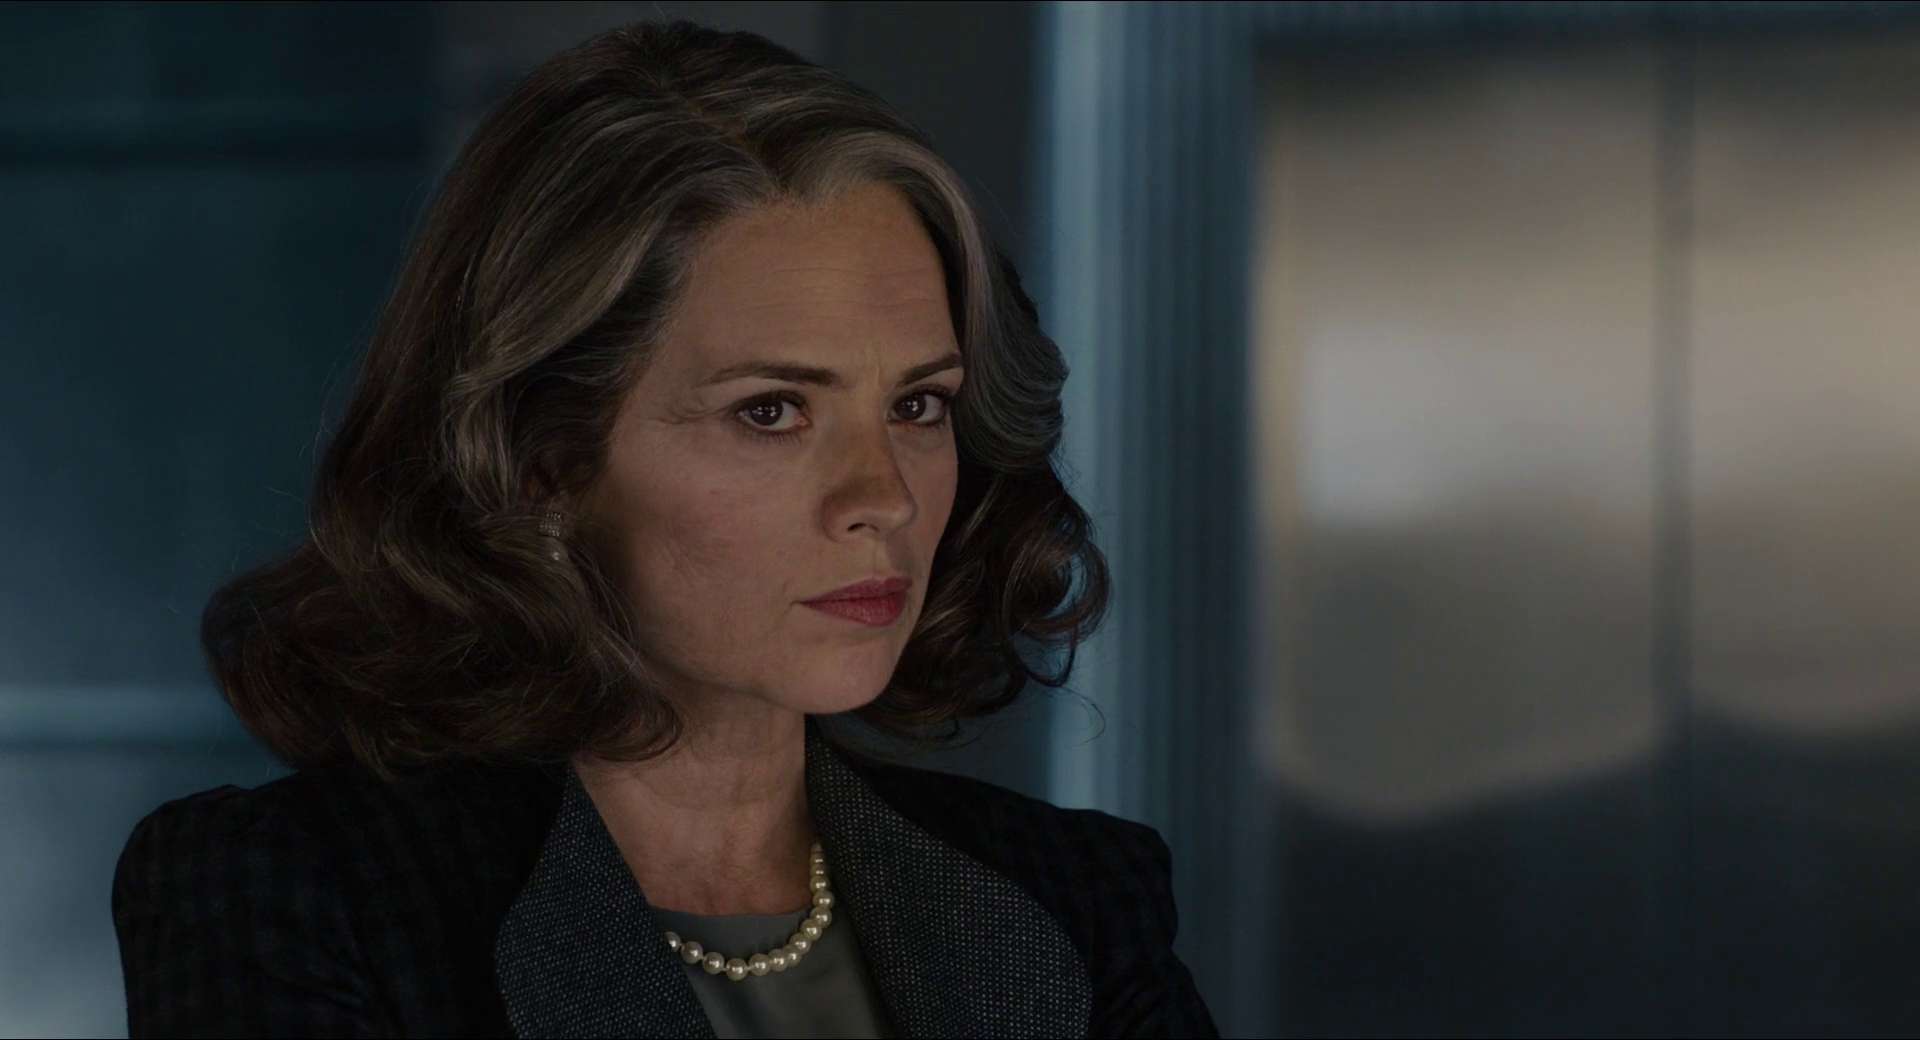

In [13]:
cap = cv2.VideoCapture(MOVIES_DIR)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_idx = 2000
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(frame_rgb)
pil_image

In [12]:
import os
import json
import pandas as pd
import numpy as np
import torch
import cv2
from PIL import Image
import clip
from tqdm import tqdm
import argparse
from pathlib import Path
import matplotlib.pyplot as plt

MOVIES_DIR = '/om2/data/public/braintreebank_movies/ant-man.mp4'

def extract_frame_at_time(video_path, timestamp):
    """
    Extract a frame from video at a specific timestamp.
    
    Args:
        video_path (str): Path to the video file
        timestamp (float): Timestamp in seconds
    Returns:
        PIL.Image: The extracted frame as PIL Image
    """
    cap = cv2.VideoCapture(video_path)
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_number = int(timestamp * fps)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    
    ret, frame = cap.read()
    cap.release()
    
    if not ret:
        print(f"Warning: Could not extract frame at timestamp {timestamp}")
        return None
    
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(frame_rgb)
    
    return pil_image

def get_clip_features(model, preprocess, image, device):
    """
    Extract CLIP features from an image.
    
    Args:
        model: CLIP model
        preprocess: CLIP preprocessing function
        image: PIL Image
        device: torch device
    
    Returns:
        torch.Tensor: CLIP features
    """
    image_input = preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    
    return image_features.cpu()

print("Loading CLIP model...")
device = torch.device('cuda')
model, preprocess = clip.load("ViT-B/32", device=device)

cap = cv2.VideoCapture(MOVIES_DIR)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
for frame_idx in [0, 2000]:
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    if not ret:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(frame_rgb)

    features = get_clip_features(model, preprocess, pil_image, device)
    print('feats',features)
    timestamps = frame_idx / fps
    print('timestamps',timestamps)

cap.release()


Loading CLIP model...
feats tensor([[-1.3054e-02, -2.2995e-02, -4.9408e-02, -6.2599e-03,  1.3550e-02,
         -3.7365e-03, -3.3813e-02,  1.1102e-01,  2.4796e-02,  2.3911e-02,
          4.4159e-02, -1.3580e-02,  3.0762e-02,  1.3161e-03, -1.2436e-02,
          9.8038e-03,  9.6054e-03,  1.3336e-02,  2.7447e-03,  3.2349e-02,
          3.3630e-02,  1.3557e-02, -6.9847e-03, -3.6583e-03, -9.8877e-03,
         -1.7319e-02, -3.6743e-02, -4.1771e-03,  3.0914e-02, -2.8671e-02,
         -1.6495e-02,  1.4442e-02, -2.4490e-02, -2.4643e-03, -4.9164e-02,
         -2.3895e-02,  1.2375e-02, -1.6434e-02,  4.8599e-03, -1.5796e-01,
         -2.6459e-02,  3.1708e-02, -1.7197e-02,  4.1046e-02, -2.2873e-02,
          1.5579e-02, -2.0950e-02, -1.0719e-02, -8.4915e-03, -2.0279e-02,
         -9.7275e-03, -3.5461e-02,  3.4790e-02,  3.0746e-03,  9.4757e-03,
          1.0704e-02,  1.6556e-02, -5.8556e-03, -1.3123e-02,  1.8692e-03,
         -3.9177e-03, -4.3274e-02,  1.4412e-02,  3.5736e-02,  2.2831e-03,
         -

In [2]:
clip_features[300].shape

(512,)

In [3]:
clip_features

array([[-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       ...,
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ]], dtype=float16)

In [21]:
clip_features

array([[-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       ...,
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ],
       [-0.013054, -0.023   , -0.0494  , ...,  0.0675  , -0.03183 ,
        -0.0256  ]], dtype=float16)

In [14]:
timestamps = np.load("/om2/data/public/braintreebank_movies_clip_preprocessed/ant-man_timestamps.npy")
timestamps

array([0.00000000e+00, 4.17083750e-02, 8.34167501e-02, ...,
       7.02648482e+03, 7.02652653e+03, 7.02656823e+03])

In [18]:
np.diff(clip_features,axis=1)

array([[-0.00994 , -0.02641 ,  0.04315 , ...,  0.0793  , -0.09937 ,
         0.006226],
       [-0.00994 , -0.02641 ,  0.04315 , ...,  0.0793  , -0.09937 ,
         0.006226],
       [-0.00994 , -0.02641 ,  0.04315 , ...,  0.0793  , -0.09937 ,
         0.006226],
       ...,
       [-0.00994 , -0.02641 ,  0.04315 , ...,  0.0793  , -0.09937 ,
         0.006226],
       [-0.00994 , -0.02641 ,  0.04315 , ...,  0.0793  , -0.09937 ,
         0.006226],
       [-0.00994 , -0.02641 ,  0.04315 , ...,  0.0793  , -0.09937 ,
         0.006226]], dtype=float16)

In [ ]:
# Calculate the L2 norm of the difference between consecutive CLIP feature vectors
clip_derivatives = np.linalg.norm(np.diff(clip_features, axis=0), axis=1)

# Plot the distribution of CLIP derivative sizes
plt.figure(figsize=(10, 5))
plt.hist(clip_derivatives, bins=100, color='orange', edgecolor='k')
plt.title("Distribution of CLIP Feature Derivative Sizes (Frame-to-Frame)")
plt.xlabel("L2 Norm of Difference (Derivative Size)")
plt.ylabel("Count")
plt.show()

# Plot the sorted derivative sizes to look for a threshold
plt.figure(figsize=(10, 4))
plt.plot(np.sort(clip_derivatives)[::-1])
plt.title("Sorted CLIP Derivative Sizes (Descending)")
plt.xlabel("Frame Index (sorted)")
plt.ylabel("Derivative Size")
plt.show()

# Print some statistics
print(f"Mean derivative size: {np.mean(clip_derivatives):.4f}")
print(f"Std derivative size: {np.std(clip_derivatives):.4f}")
print(f"Max derivative size: {np.max(clip_derivatives):.4f}")
print(f"99th percentile: {np.percentile(clip_derivatives, 99):.4f}")
print(f"95th percentile: {np.percentile(clip_derivatives, 95):.4f}")

# Optionally, plot the derivative sizes over time to see where large jumps occur
plt.figure(figsize=(15, 4))
plt.plot(clip_derivatives, color='purple')
plt.title("CLIP Derivative Sizes Over Time")
plt.xlabel("Frame Index")
plt.ylabel("Derivative Size")
plt.show()
